In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load dataset using keras

In [34]:
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# Load dataset manually 
- Download the data manually from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
- Create a folder in a location that you have saved your jupyter notebook and call it dataset
- Move the downloaded file from 'Downloads' to 'dataset'

In [35]:
# Load dataset manually 
mnist = np.load('dataset/mnist.npz')
print(mnist.files)

x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test'] 
y_test = mnist['y_test']

['x_test', 'x_train', 'y_train', 'y_test']


## Let's visualize what is in our dataset

(-0.5, 27.5, 27.5, -0.5)

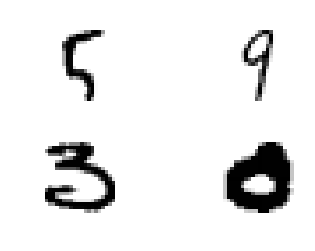

In [36]:
img_size = 28
plt.subplot(2, 2, 1)
plt.imshow(x_train[100].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(x_train[900].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(x_train[670].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(x_train[1999].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

# Normalize the data (scale it between 0 and 1)
Let's first take a look at one sample in our dataset

In [37]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As you can see in the printed array, currently our pixels (features) are between 0 and 255. When we normalize our data, pixels will be between 0 and 1. Therefore, our network will learn easier! 

In [38]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Now, let's see how our data looks like:

In [39]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Let's take a look at our data again

(-0.5, 27.5, 27.5, -0.5)

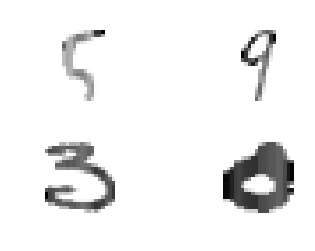

In [43]:
img_size = 28
plt.subplot(2, 2, 1)
plt.imshow(x_train[100].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(x_train[900].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(x_train[670].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(x_train[1999].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')

## Dataset Exploration
In this workshop, we will use the 'mnist dataset' to classify the hand written digits images. In this dataset, there are 70000 images. As digits are from 0 to 9, therefore there are 10 unique digits in this data. 

In [40]:
print("x_train shape: " , x_train.shape)
print("y_train shape: " , y_train.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


- The shape of the x_train is (60000, 28, 28) <br>
> 60000 means that we have 60000 images<br>
> 28 means that our image size is 28x28 (28x28 pixels)<br>
- The shape of the Y is (60000,)<br>
> 60000 means that we have 60000 labels (10 unique lables from 0 to 9) <br>

## Now, let's build our feed forward model

In [61]:
# a basic feed-forward model
model = tf.keras.models.Sequential()

# Input layer: Our input array (X) is a 3 dimensional array. 
#In order to be able to use it in our first deep learning model, 
#we need to make it flatten (2D).So, we need to take this 28x28 image, and make it a flat 1x784
model.add(tf.keras.layers.Flatten())

# a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# our output layer. 10 units for 10 classes. Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# train the model 
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 51us/step - loss: 0.2618 - acc: 0.9247
Epoch 2/3
60000/60000 [==============================] - 3s 48us/step - loss: 0.1079 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 44us/step - loss: 0.0738 - acc: 0.9767


In [65]:
# Test if the model generalize or overfit
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 20us/step
0.09363970999494195
0.9706


In [66]:
model.save('digit.model')

In [69]:
digit_model = tf.keras.models.load_model('digit.model')

In [70]:
predictions = digit_model.predict(x_test)

In [72]:
print(predictions)

[[7.6583052e-11 3.3914485e-08 1.9461515e-07 ... 9.9998963e-01
  1.1656626e-10 1.2059029e-07]
 [7.4752835e-09 1.4052712e-04 9.9983454e-01 ... 6.6175993e-08
  1.2733738e-06 1.9405559e-10]
 [2.7666033e-07 9.9968529e-01 1.3809693e-05 ... 2.0912406e-04
  5.1620995e-05 3.6066538e-06]
 ...
 [4.4608115e-08 5.0809281e-06 2.7248429e-08 ... 2.5988054e-05
  5.0891285e-06 3.5097080e-03]
 [1.6911763e-07 9.7068903e-07 2.8163861e-08 ... 7.9183901e-06
  2.1436064e-05 3.8204092e-08]
 [2.6660525e-06 1.2293344e-08 2.3061411e-06 ... 1.0165040e-08
  1.6208338e-07 4.7041596e-08]]


In [75]:
print(np.argmax(predictions[10]))

0


(-0.5, 27.5, 27.5, -0.5)

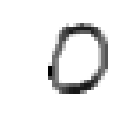

In [76]:
img_size = 28
plt.subplot(2, 2, 1)
plt.imshow(x_test[10].reshape(img_size, img_size), cmap = plt.cm.binary)
plt.axis('off')